In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
city_data= []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print("Beginning Data Retrieval")
count = 0
for city in cities:
    params = {
        "appid": api_key,
        "q": city
    }
    count += 1
    print("Processing Record %s of city %s" %(count, city))
    try:
        response=requests.get(url, params).json()
        #latitude and longititude
        city_lat = response["coord"]["lat"]
        city_lon = response["coord"]["lon"]
        #main: max temperature and humidity
        temp_max = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        #weather sys, date, clouds, and wind
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        
        city_data.append({
            "City": city,
            "Latitude": city_lat,
            "Longitude": city_lon,
            "Max Temperature": temp_max,
            "Humidity": city_humidity,
            "Country": city_country,
            "Cloud Coverage": city_clouds,
            "Wind Speed": city_wind,
            "Date": city_date     
        })
        
    except:
        print("City not found")
        pass


Beginning Data Retrieval
Processing Record 1 of city busselton
Processing Record 2 of city santa cruz
Processing Record 3 of city kapaa
Processing Record 4 of city hobart
Processing Record 5 of city pevek
Processing Record 6 of city bambous virieux
Processing Record 7 of city prudentopolis
Processing Record 8 of city mahebourg
Processing Record 9 of city port alfred
Processing Record 10 of city jamestown
Processing Record 11 of city turtkul
City not found
Processing Record 12 of city faya
Processing Record 13 of city avarua
Processing Record 14 of city mount isa
Processing Record 15 of city barcelos
Processing Record 16 of city mar del plata
Processing Record 17 of city albany
Processing Record 18 of city pacific grove
Processing Record 19 of city port elizabeth
Processing Record 20 of city auriflama
Processing Record 21 of city samarai
Processing Record 22 of city north bend
Processing Record 23 of city atuona
Processing Record 24 of city naze
Processing Record 25 of city bluff
Proces

Processing Record 202 of city verkhnyaya inta
Processing Record 203 of city the valley
Processing Record 204 of city sao joao da barra
Processing Record 205 of city saravan
Processing Record 206 of city buala
Processing Record 207 of city tsihombe
City not found
Processing Record 208 of city sakakah
City not found
Processing Record 209 of city sovetskiy
Processing Record 210 of city urcos
Processing Record 211 of city tovuz
Processing Record 212 of city trojes
Processing Record 213 of city hithadhoo
Processing Record 214 of city tuzha
Processing Record 215 of city tuktoyaktuk
Processing Record 216 of city ijaki
City not found
Processing Record 217 of city manzhouli
Processing Record 218 of city olinda
Processing Record 219 of city yangambi
Processing Record 220 of city provideniya
Processing Record 221 of city araouane
Processing Record 222 of city molina
Processing Record 223 of city xai-xai
Processing Record 224 of city komsomolskiy
Processing Record 225 of city verkhnevilyuysk
Proce

Processing Record 406 of city chokurdakh
Processing Record 407 of city ostersund
Processing Record 408 of city bijie
Processing Record 409 of city shamary
Processing Record 410 of city hervey bay
Processing Record 411 of city sangar
Processing Record 412 of city puerto del rosario
Processing Record 413 of city alice springs
Processing Record 414 of city cheney
Processing Record 415 of city owando
Processing Record 416 of city lolua
City not found
Processing Record 417 of city nuevitas
Processing Record 418 of city larsnes
Processing Record 419 of city chalchihuites
Processing Record 420 of city panaba
Processing Record 421 of city prince rupert
Processing Record 422 of city altamira
Processing Record 423 of city norman wells
Processing Record 424 of city rio cuarto
Processing Record 425 of city granada
Processing Record 426 of city egvekinot
Processing Record 427 of city kegayli
City not found
Processing Record 428 of city wajir
Processing Record 429 of city skjervoy
Processing Record 

Processing Record 604 of city koumac
Processing Record 605 of city newport
Processing Record 606 of city pitimbu
Processing Record 607 of city micheweni
Processing Record 608 of city one hundred mile house
City not found
Processing Record 609 of city koygorodok
Processing Record 610 of city glen allen
Processing Record 611 of city necochea
Processing Record 612 of city bay city
Processing Record 613 of city savannah bight
Processing Record 614 of city benghazi
Processing Record 615 of city jacmel
Processing Record 616 of city suhbaatar
Processing Record 617 of city batemans bay


In [9]:
city_df = pd.DataFrame(city_data)
city_df.head()

,City,Cloud Coverage,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,busselton,48,AU,1535568773,100,-33.64,115.35,57.10,25.52
1,santa cruz,20,US,1535567700,53,36.97,-122.03,73.40,10.29
2,kapaa,75,US,1535565360,81,22.08,-159.32,80.06,16.11
3,hobart,0,AU,1535567400,81,-42.88,147.33,33.80,8.05
4,pevek,92,RU,1535568904,98,69.70,170.27,44.50,7.63


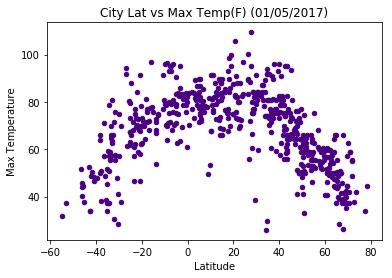

In [10]:
#scatter plot: Max Temperature vs Latitude
city_df.plot.scatter("Latitude", "Max Temperature", color="indigo")
plt.title("City Lat vs Max Temp(F) (01/05/2017)")
plt.savefig("../Images/maxtemp.png")

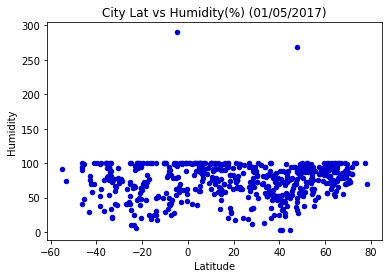

In [11]:
#scatter plot: Humidity vs Latitude
city_df.plot.scatter("Latitude", "Humidity", color="mediumblue")
plt.title("City Lat vs Humidity(%) (01/05/2017)")
plt.savefig("../Images/humidity.png")

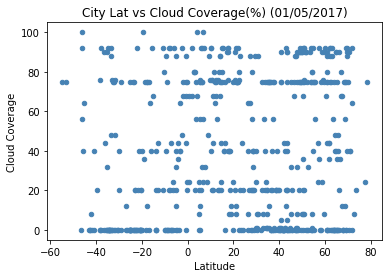

In [12]:
#scatter plot: Cloudiness vs Latitude
city_df.plot.scatter("Latitude", "Cloud Coverage", color="steelblue")
plt.title("City Lat vs Cloud Coverage(%) (01/05/2017)")
plt.savefig("../Images/clouds.png")

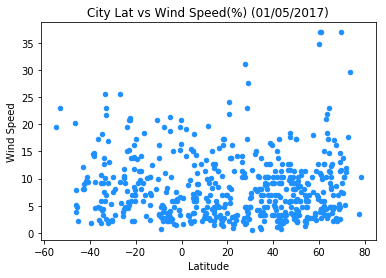

In [13]:
#scatter plot: Humidity vs Latitude
city_df.plot.scatter("Latitude", "Wind Speed", color="dodgerblue")
plt.title("City Lat vs Wind Speed(%) (01/05/2017)")
plt.savefig("../Images/wind.png")